In [ ]:
import tensorflow as tf
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Path to image file 
images = tf.data.Dataset.list_files("C:\\Users\\Connor\\Desktop\\Hard Hat Recongnition\\data\\images_pruned\\*.png", shuffle=False)
# Checks image path is corrrect
images.as_numpy_iterator().next()

In [47]:
# Load a PNG image from the given file path and return a decoded image tensor
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_png(byte_img)
    img = tf.image.resize(img, [416, 416]) # So all imgs are same size
    img = img / 255 # Normalise pixel
    return img

In [48]:
# Applies to each image
images = images.map(load_image)

In [49]:
images.as_numpy_iterator().next()

array([[[0.7411765 , 0.7882353 , 0.8352941 ],
        [0.7411765 , 0.7882353 , 0.8352941 ],
        [0.7411765 , 0.7882353 , 0.8352941 ],
        ...,
        [0.75686276, 0.8117647 , 0.84705883],
        [0.75686276, 0.8117647 , 0.84705883],
        [0.75686276, 0.8117647 , 0.84705883]],

       [[0.7411765 , 0.7882353 , 0.8352941 ],
        [0.7411765 , 0.7882353 , 0.8352941 ],
        [0.7411765 , 0.7882353 , 0.8352941 ],
        ...,
        [0.75686276, 0.8117647 , 0.84705883],
        [0.75686276, 0.8117647 , 0.84705883],
        [0.75686276, 0.8117647 , 0.84705883]],

       [[0.7411765 , 0.7882353 , 0.8352941 ],
        [0.7411765 , 0.7882353 , 0.8352941 ],
        [0.7411765 , 0.7882353 , 0.8352941 ],
        ...,
        [0.75686276, 0.8117647 , 0.84705883],
        [0.75686276, 0.8117647 , 0.84705883],
        [0.75686276, 0.8117647 , 0.84705883]],

       ...,

       [[0.78039217, 0.80784315, 0.8392157 ],
        [0.78039217, 0.80784315, 0.8392157 ],
        [0.7764706 , 0

In [50]:
# Generate in batches of 4
image_generator = images.batch(4).as_numpy_iterator()

In [56]:
# Generates next 4 images
plot_images = image_generator.next()

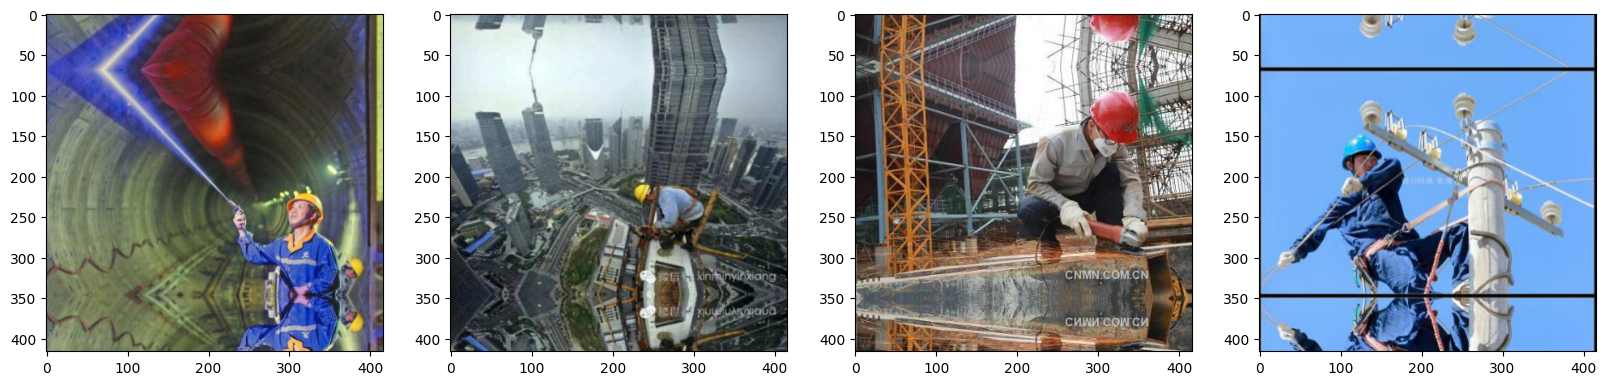

In [57]:
# Plot the images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [ ]:
!labelme